### Note
This notebook analyses experiments in which recurrent connections in the eA1 are grown.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from fna.tools.signals import make_simple_kernel, pad_array

import os
import sys
import re
import sys

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.


In [2]:
sys.path.append("../demyelination/") # we need this to successfully read pickle files
sys.path.append("../") # we need this to successfully read pickle files

In [3]:
def gatherSpikes(path, filename, nthreads, brainPart, neuronIdFirst, neuronIdLast):
    '''
    Example Usage: 
    gatherSpikes("demyelination/data/adaptation-aone-plast/activity/", \
                 "spk_adaptation-aone-plast_T=0_nuX_aone=20.0_gamma_aone=9.0_w_input_aone=15.0_", \
                 2, "iA1", 2001, 2500)
    '''
    
    spikes = {}
    files = {}
    
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))
    
    for neuron in range(neuronIdFirst, neuronIdLast+1):
        rthread = neuron % nthreads
        files[0].spikeobj[brainPart].spiketrains[neuron] = files[rthread].spikeobj[brainPart].spiketrains[neuron]
    
    return files[0].spikeobj[brainPart]

# def gatherConnectivity(path, filename, nthreads, brainPart, DenType):
#     files = {}
#     # read files
#     for threadid in range(nthreads):
#         files[threadid] = pd.read_pickle(path + filename + str(threadid))

#     conn = np.sum([files[x].connectivity['z_connected']['Den'][DenType][brainPart] for x in range(nthreads)], axis=0)
    
#     return conn

def gatherConnectivity(path, filename, nthreads):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    for var in ["z", "z_connected"]:
        for synElem in ["Axon", "Den"]:
            for synElemType in ["ex", "in"]:
                for brainPart in ["eA1", "iA1"]:
                    files[0].connectivity[var][synElem][synElemType][brainPart] = \
                    np.sum([files[x].connectivity[var][synElem][synElemType][brainPart] for x in range(nthreads)], axis=0)
    
    return files[0].connectivity

def gatherNestConnectivity(path, filename, nthreads, source, target):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    conn = np.sum([files[x].nestconnectivity[source][target] for x in range(nthreads)], axis=0)
    
    return conn

def gatherCalcium (path, filename, nthreads):
    files = {}
    # read files
    for threadid in range(nthreads):
        files[threadid] = pd.read_pickle(path + filename + str(threadid))

    calc = {}
    for source in ['eA1', 'iA1']:
        calc.update( {source : np.mean([files[x].calcium[source] for x in range(nthreads)], axis=0)} )
    
    return calc

In [4]:
pth = "../demyelination/data/destexhe-grow-recur-ea1/activity/"
# fl = 'spk_destexhe-scaleup-sp_T=34_'
fl = 'spk_destexhe-grow-recur-ea1_T=0_'

In [5]:
connectivity = gatherConnectivity(pth, fl, 8)

** mnist.loader ** package is not installed. To have functions using mnist.loader please install the package.
** tables ** package is not installed. To have functions using tables please install the package.


In [6]:
ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

# destexhe-grow-recur-ea1

Connections are grown in the CTX.
Growth rates for recurrent connections in the iA1 are explored from .001 to 1.

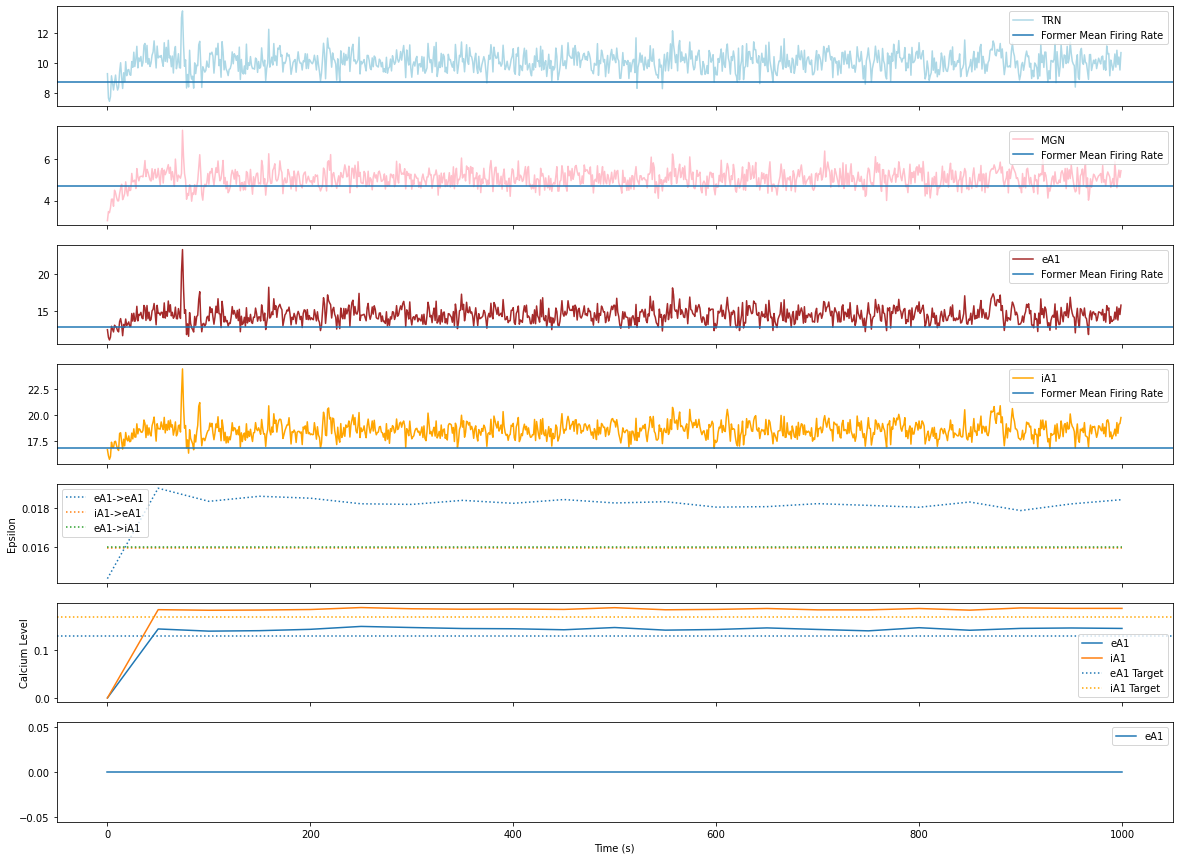

In [7]:
pth = "../demyelination/data/destexhe-grow-recur-ea1/activity/"
fl = 'spk_destexhe-grow-recur-ea1_T=2_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 1000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 1001, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-overshoot-calcium-slowrate-highupdate.pdf")

In [8]:
gatherCalcium(pth, fl, 8)

{'eA1': array([0.        , 0.14427488, 0.13970454, 0.14068773, 0.14352099,
        0.14957815, 0.1472521 , 0.14520067, 0.14469347, 0.14259656,
        0.14727708, 0.1418115 , 0.14314451, 0.14646932, 0.14324979,
        0.14032739, 0.14690751, 0.14155671, 0.14544711, 0.14630766,
        0.14537619]),
 'iA1': array([0.        , 0.18460901, 0.18337615, 0.18382737, 0.18491776,
        0.18902614, 0.18650776, 0.18554233, 0.18594789, 0.18514886,
        0.18877122, 0.18436681, 0.18517426, 0.18708129, 0.18421596,
        0.18418352, 0.18703713, 0.18359802, 0.18822199, 0.18732813,
        0.18730527])}

In [9]:
perc_ex_eA1

array([0.01436725, 0.01903425, 0.0183575 , 0.018619  , 0.01851925,
       0.01823075, 0.0181995 , 0.01840775, 0.0182555 , 0.01844925,
       0.01827325, 0.018338  , 0.01805925, 0.01808325, 0.01823775,
       0.01814875, 0.01805225, 0.01832225, 0.0178815 , 0.01822475,
       0.0184445 ])

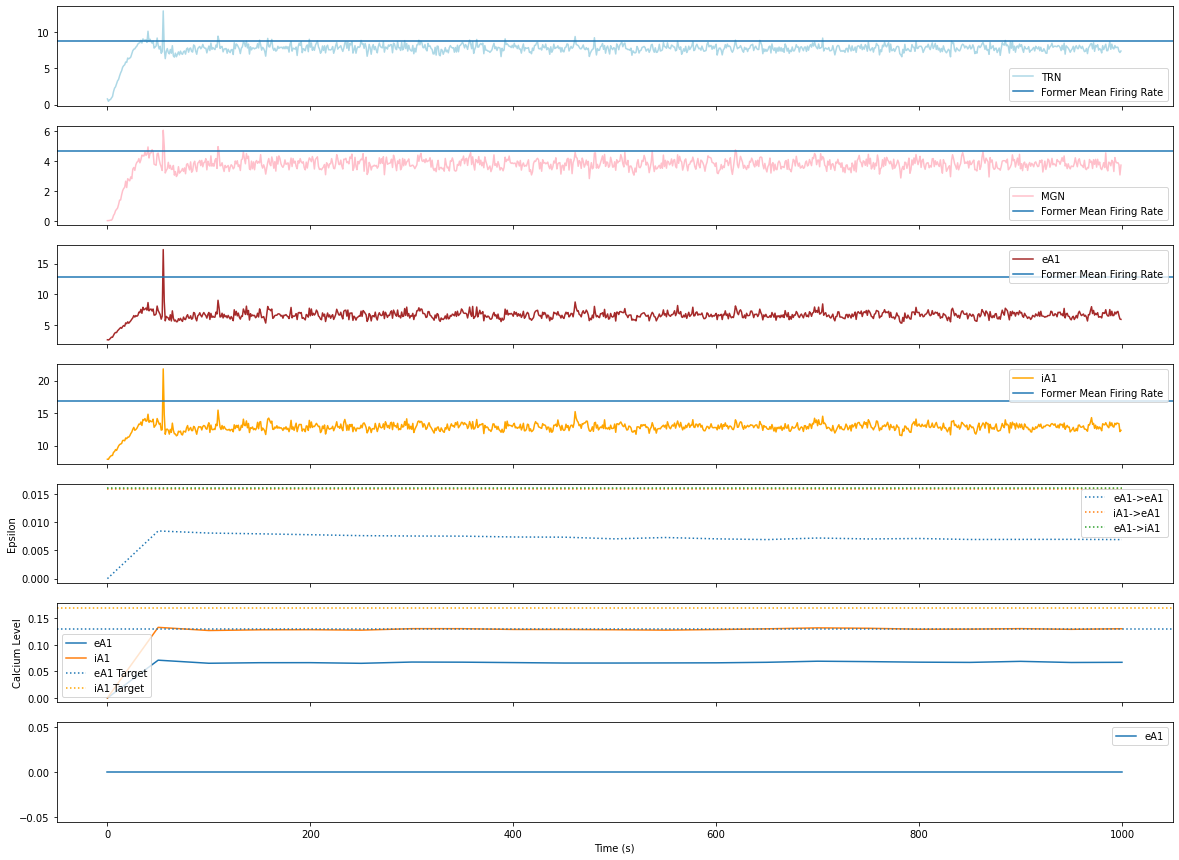

In [10]:
pth = "../demyelination/data/destexhe-grow-fromzero-recur-ea1/activity/"
fl = 'spk_destexhe-grow-fromzero-recur-ea1_T=2_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 1000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 1001, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-overshoot-calcium-slowrate-highupdate.pdf")

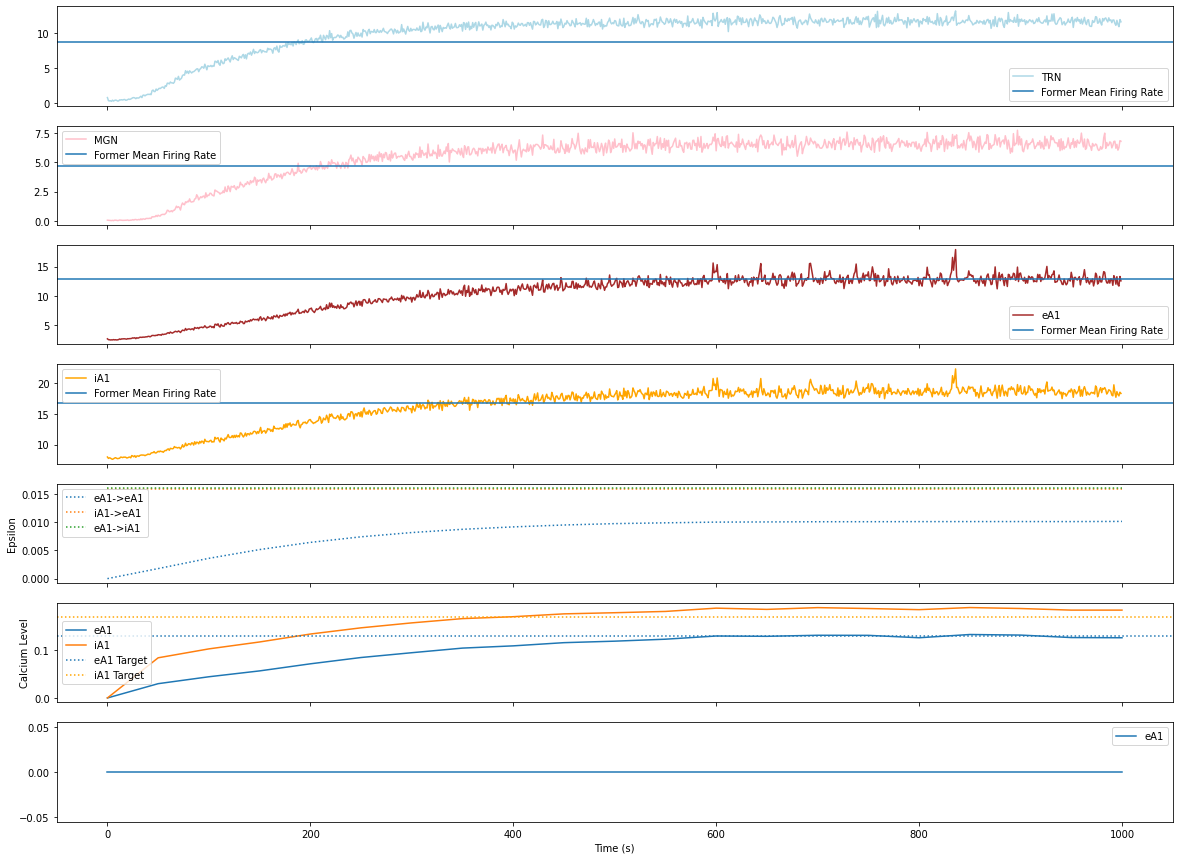

In [11]:
pth = "../demyelination/data/destexhe-grow-fromzero-recur-ea1-fullcalc/activity/"
fl = 'spk_destexhe-grow-fromzero-recur-ea1-fullcalc_T=1_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 1000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 1001, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-overshoot-calcium-slowrate-highupdate.pdf")

plasticity-debugging

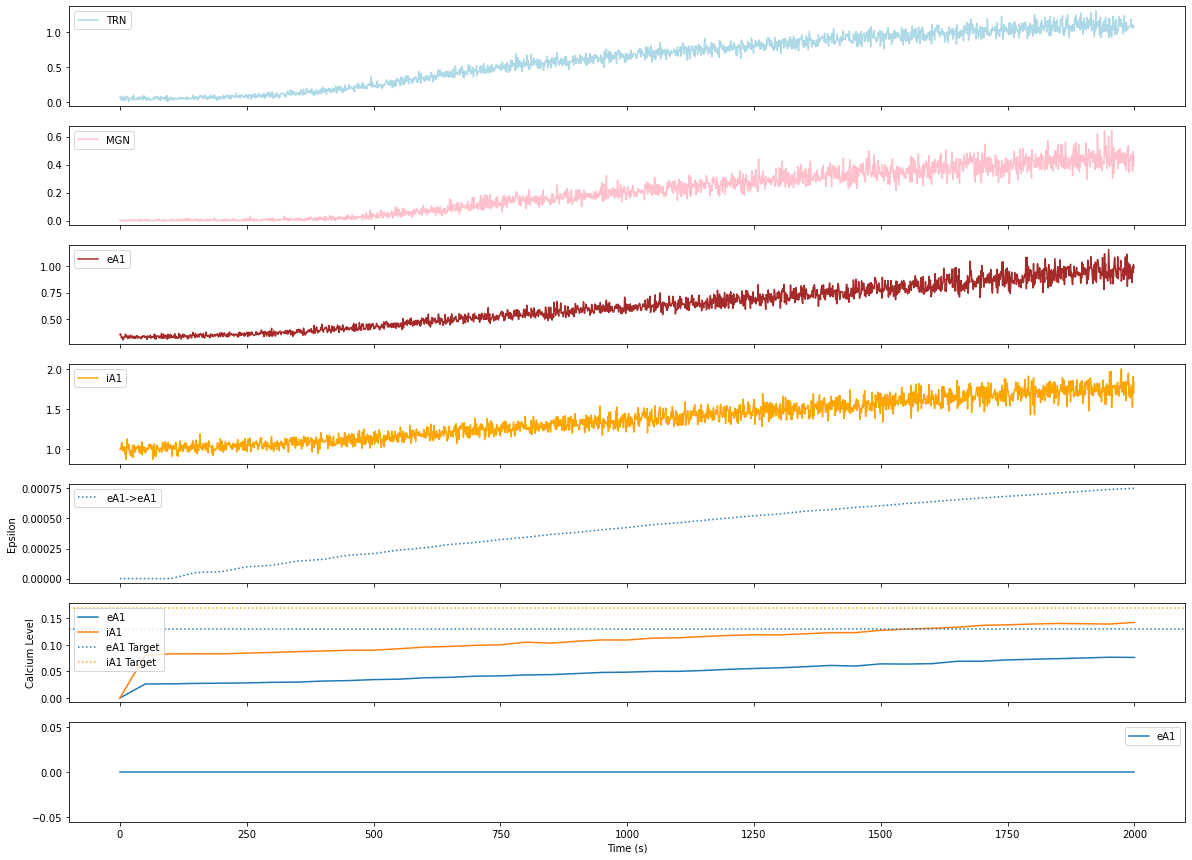

In [12]:
pth = "../demyelination/data/plasticity-debugging-unithread/activity/"
fl = 'spk_plasticity-debugging-unithread_T=0_'

connectivity = gatherConnectivity(pth, fl, 1)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             1, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             1, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             1, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             1, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 2000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 1, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
# ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 1, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
# ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 1, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
# ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 1, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
# ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 2001, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-overshoot-calcium-slowrate-highupdate.pdf")

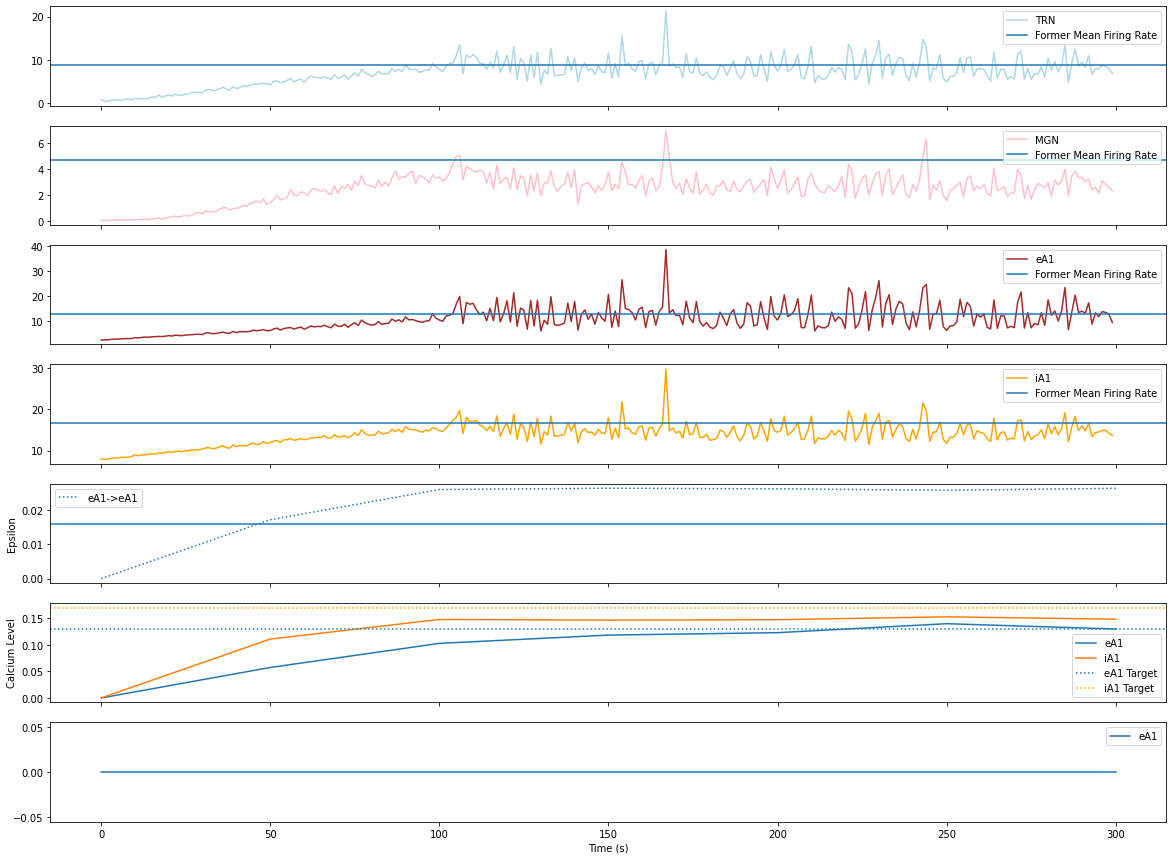

In [13]:
pth = "../demyelination/data/plasticity-debugging-noautapses/activity/"
fl = 'spk_plasticity-debugging-noautapses_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 301, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse.bpdf")

In [14]:
perc_ex_eA1, ex_eA1

(array([0.        , 0.01716425, 0.025965  , 0.02634325, 0.026183  ,
        0.0257535 , 0.0263185 ]),
 array([     0,  68657, 103860, 105373, 104732, 103014, 105274]))

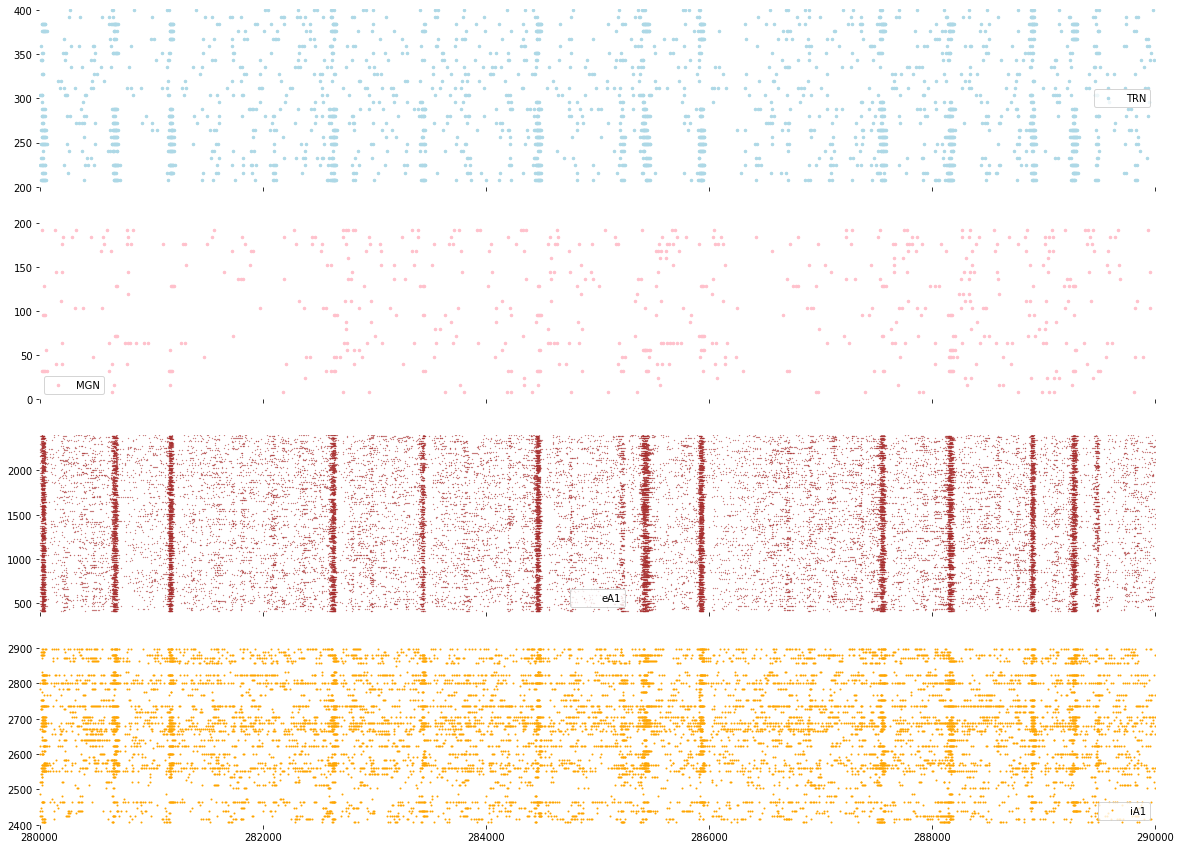

In [15]:

# p = pd.read_pickle(pth + f[0])
#fig, ax = plt.subplots(nrows=6, ncols=1)
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_size_inches(20, 15)
#plt.ylim(0, 45)
#plt.title(f[0])


tstart = 280 * 1000
tstop = 290 * 1000

gatherSpikes(pth, fl, 1, "TRN", 201, 400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[0], dt=10, display=False, color='lightblue', ms=5, label="TRN")

gatherSpikes(pth, fl, 1, "MGN", 1, 200).time_slice(tstart, tstop)\
.raster_plot(ax=ax[1], dt=10, display=False, color='pink', ms=5, label="MGN")

gatherSpikes(pth, fl, 1, "eA1", 401, 2400).time_slice(tstart, tstop)\
.raster_plot(ax=ax[2], dt=10, display=False, color='brown', ms=.5, label="eA1")

gatherSpikes(pth, fl, 1, "iA1", 2401, 2900).time_slice(tstart, tstop)\
.raster_plot(ax=ax[3], dt=10, display=False, color='orange', ms=2, label="iA1")

for x in [0, 1, 2, 3]:
    ax[x].set_frame_on(False)
#     ax[x].tick_params(labelbottom=False)
#     ax[x].get_yaxis().set_ticks([])
    ax[x].legend()

# fig.suptitle(f[0], fontsize=15);

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/raster-" + f[0] + ".pdf")

## No Autapses, Update Interval of 10ms instead of 1

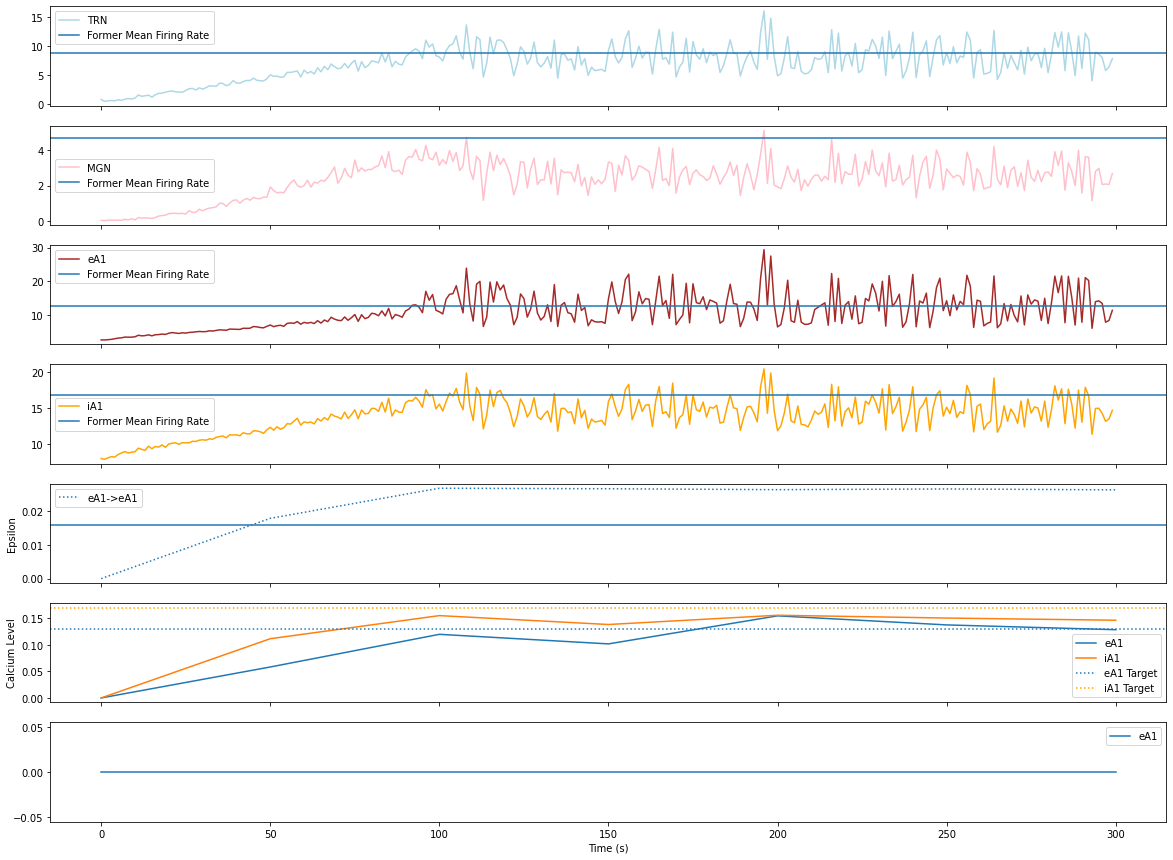

In [16]:
pth = "../demyelination/data/plasticity-debugging-noautapses-hiupdate/activity/"
fl = 'spk_plasticity-debugging-noautapses-hiupdate_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 301, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse.bpdf")

## No Autapses, Update Interval 100ms

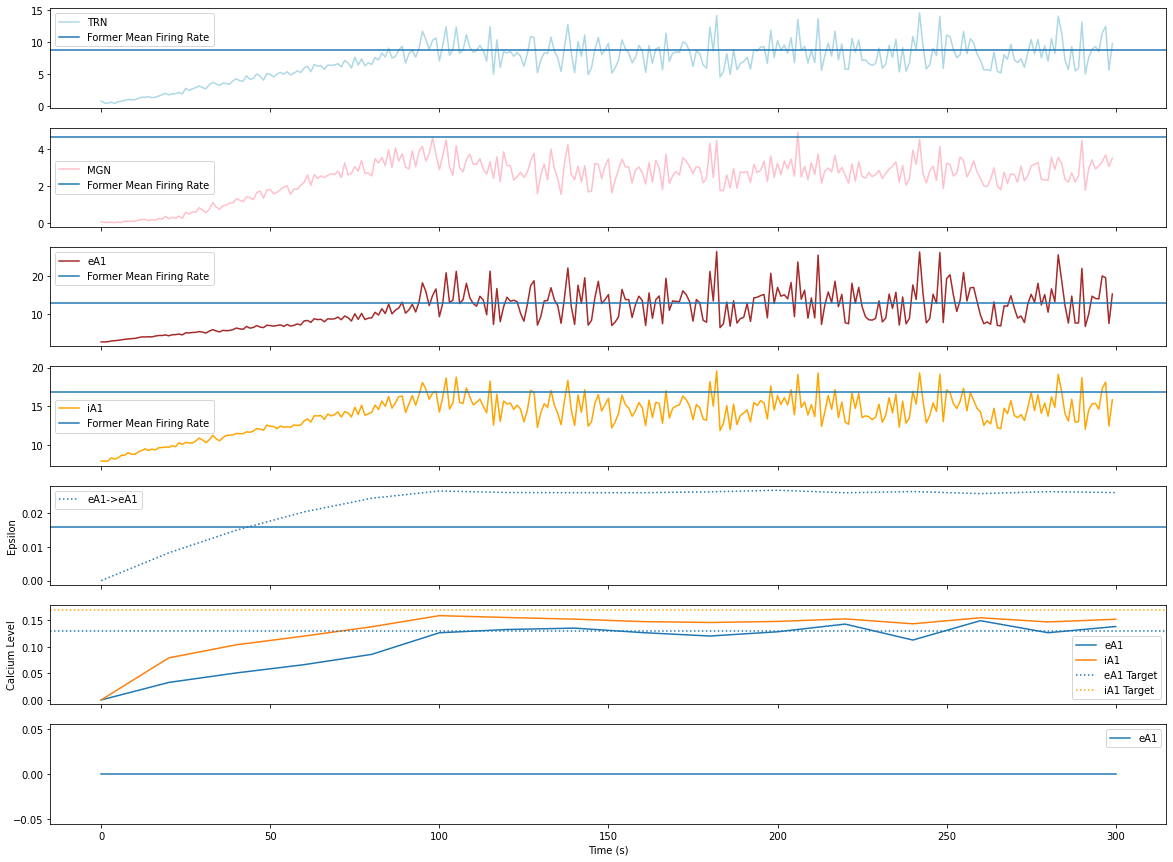

In [17]:
pth = "../demyelination/data/plasticity-debugging-noautapses-hundredupdate/activity/"
fl = 'spk_plasticity-debugging-noautapses-hundredupdate_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 301, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse.bpdf")

## SP was disabled when the Conn density reached 1.6%

/home/pbr-student/miniconda3/envs/nest/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/pbr-student/miniconda3/envs/nest/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/pbr-student/miniconda3/envs/nest/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

ValueError: x and y must have same first dimension, but have shapes (7,) and (83,)

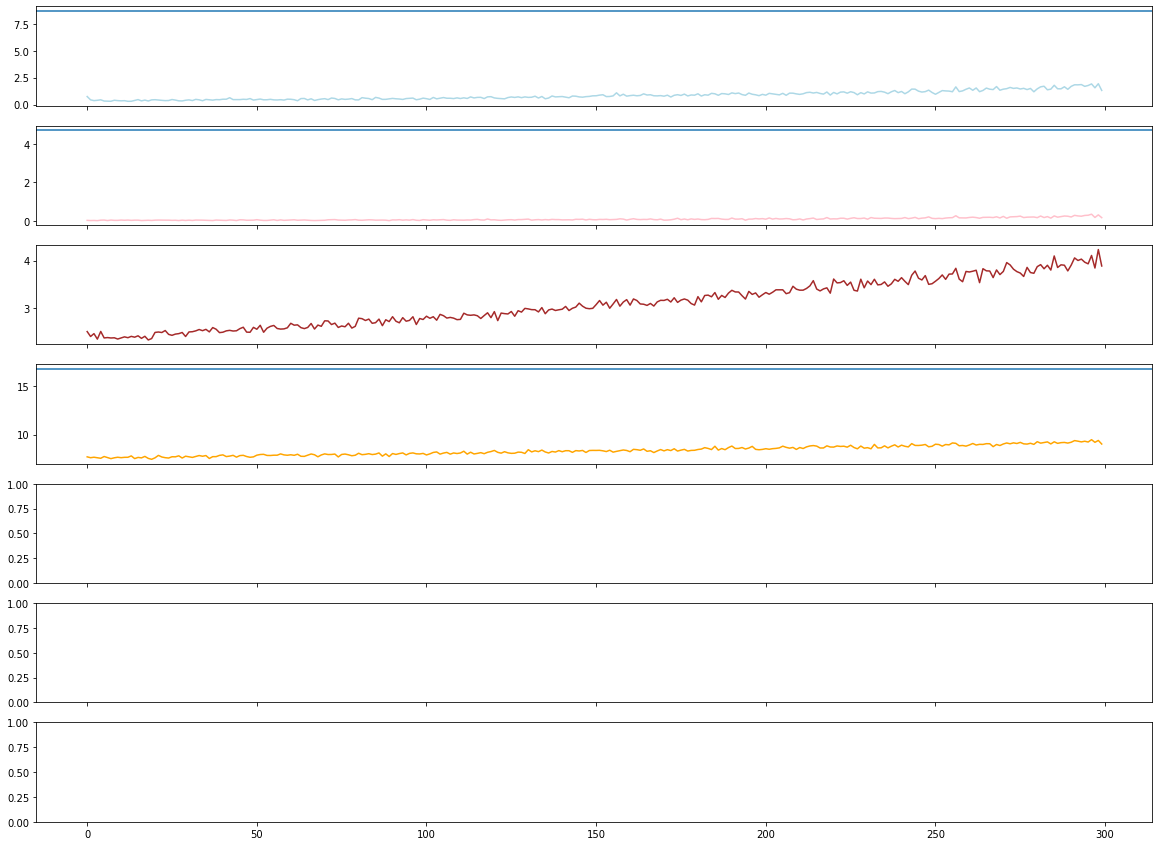

In [18]:
pth = "../demyelination/data/plasticity-debugging-noautapses-saveatonepsix-disableplast/activity/"
fl = 'spk_plasticity-debugging-noautapses-saveatonepsix-disableplast_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
# ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 301, 50)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

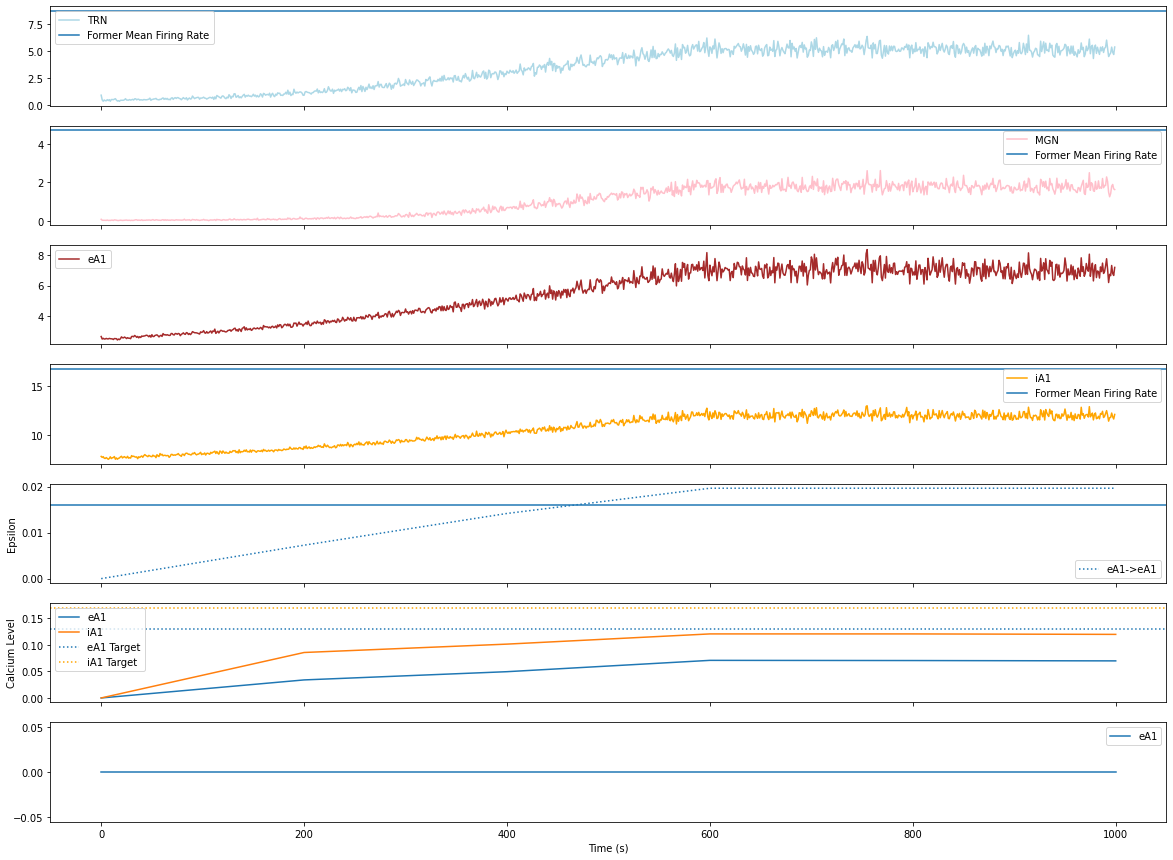

In [19]:
pth = "../demyelination/data/plasticity-debugging-noautapses-saveatonepsix-disableplast/activity/"
fl = 'spk_plasticity-debugging-noautapses-saveatonepsix-disableplast_T=0_'

nthreads = 1

connectivity = gatherConnectivity(pth, fl, nthreads)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 1000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, nthreads, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
# ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 1001, 200)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

## plasticity-debugging-noautapses-eightypc

In [20]:
pth = "../demyelination/data/plasticity-debugging-noautapses-eightypc/activity/"
fl = 'spk_plasticity-debugging-noautapses-eightypc_T=0_'

connectivity = gatherConnectivity(pth, fl, 1)

nthreads = 8

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 100 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, nthreads, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 101, 10)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '../demyelination/data/plasticity-debugging-noautapses-eightypc/activity/spk_plasticity-debugging-noautapses-eightypc_T=0_1'

## Without adaptation in the eA1

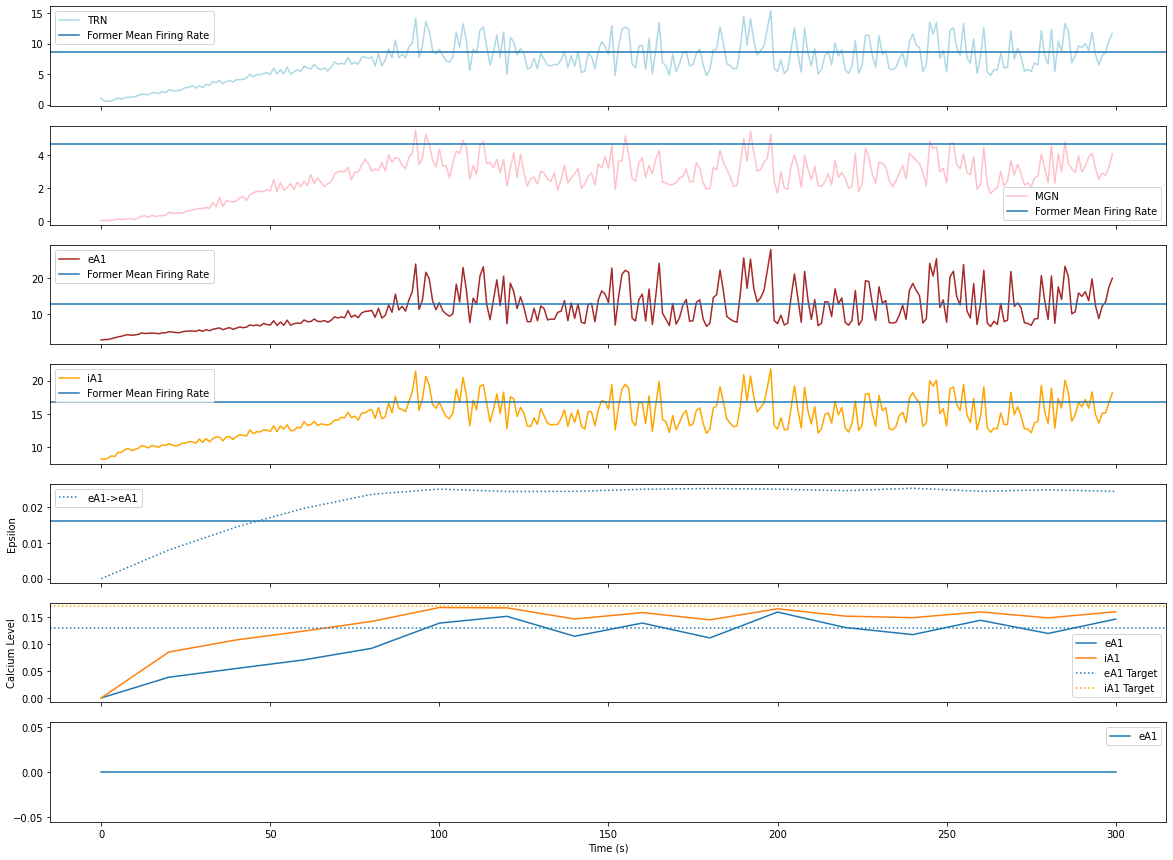

In [21]:
pth = "../demyelination/data/plasticity-debugging-noautapses-noadp/activity/"
fl = 'spk_plasticity-debugging-noautapses-noadp_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 300 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 301, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

## After difference resolution

In [ ]:
! ls ../demyelination/data/plasticity-debugging-noautapses-noea1/activity

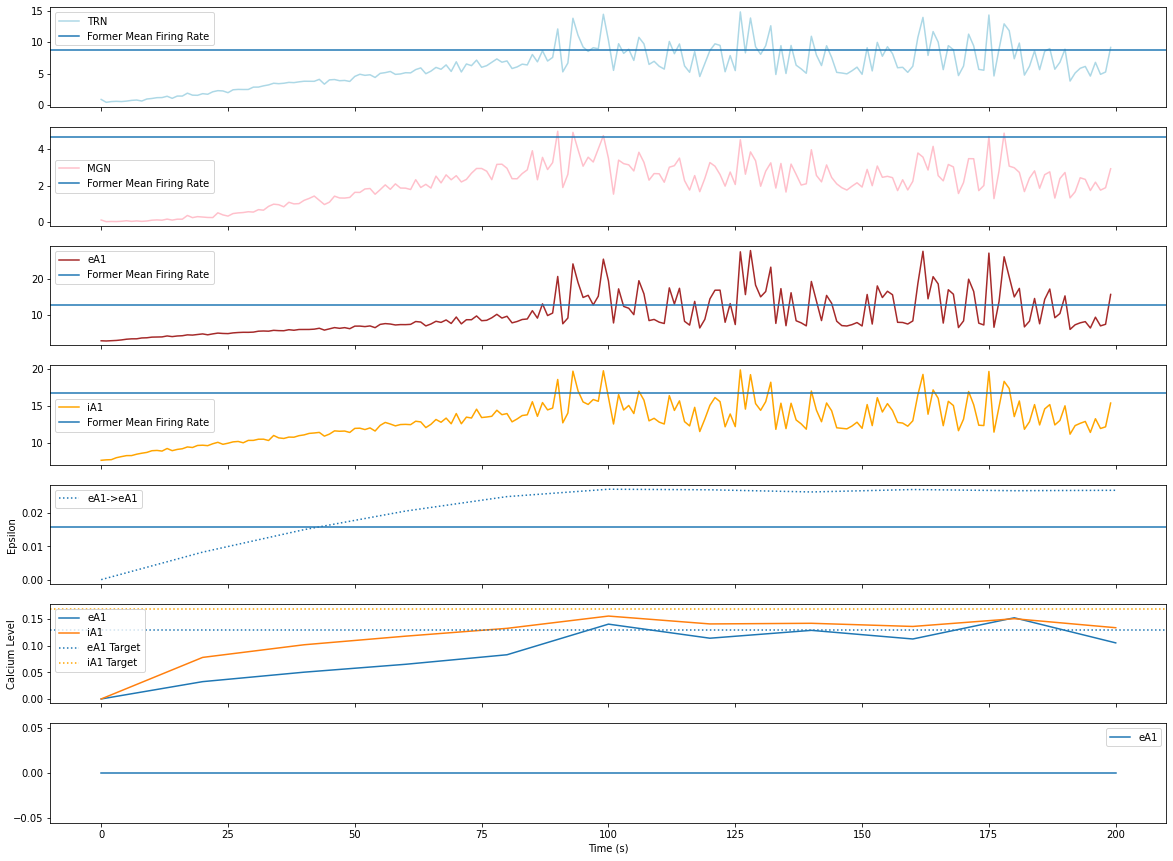

In [22]:
pth = "../demyelination/data/plasticity-debugging-noautapses-noea1/activity/"
fl = 'spk_plasticity-debugging-noautapses-noea1_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 200 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

## plasticity-noautapses-6supdate

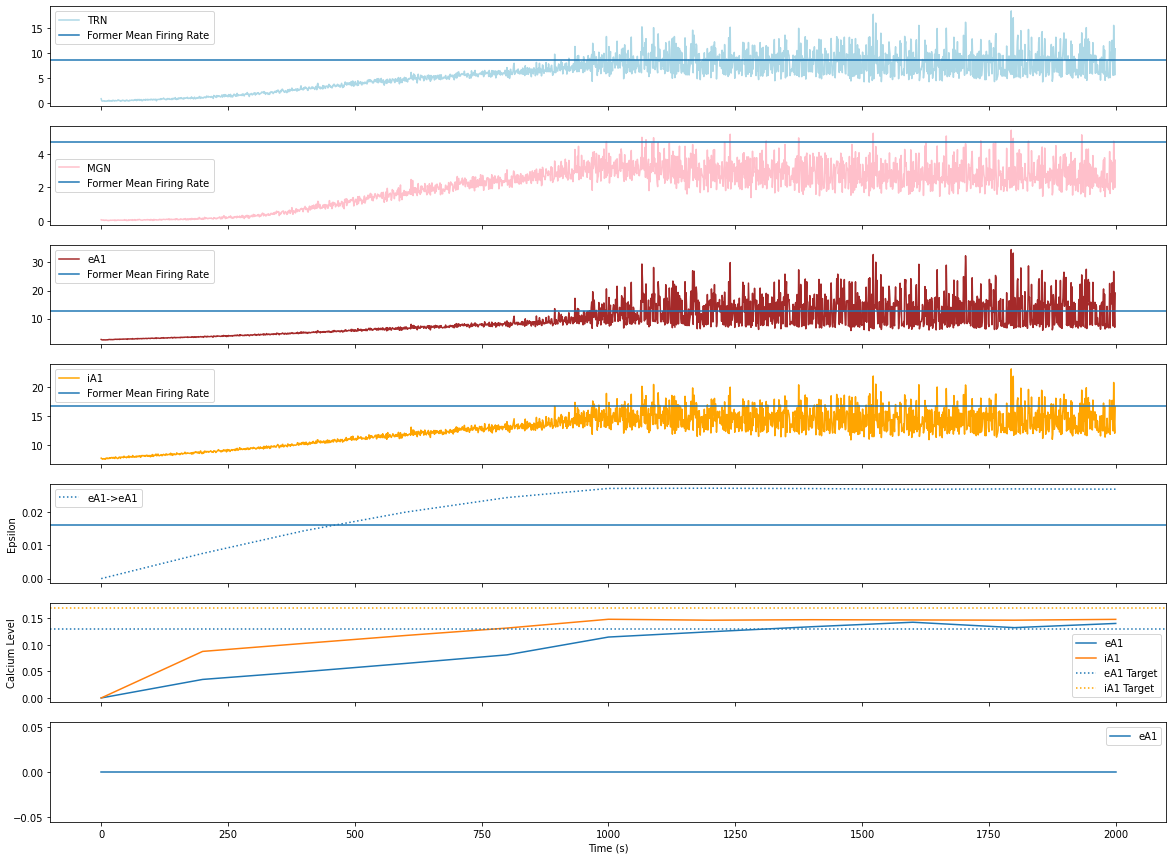

In [23]:
pth = "../demyelination/data/plasticity-noautapses-6supdate/activity/"
fl = 'spk_plasticity-noautapses-6supdate_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 2000 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 2001, 200)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(7)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

## plasticity-cadist

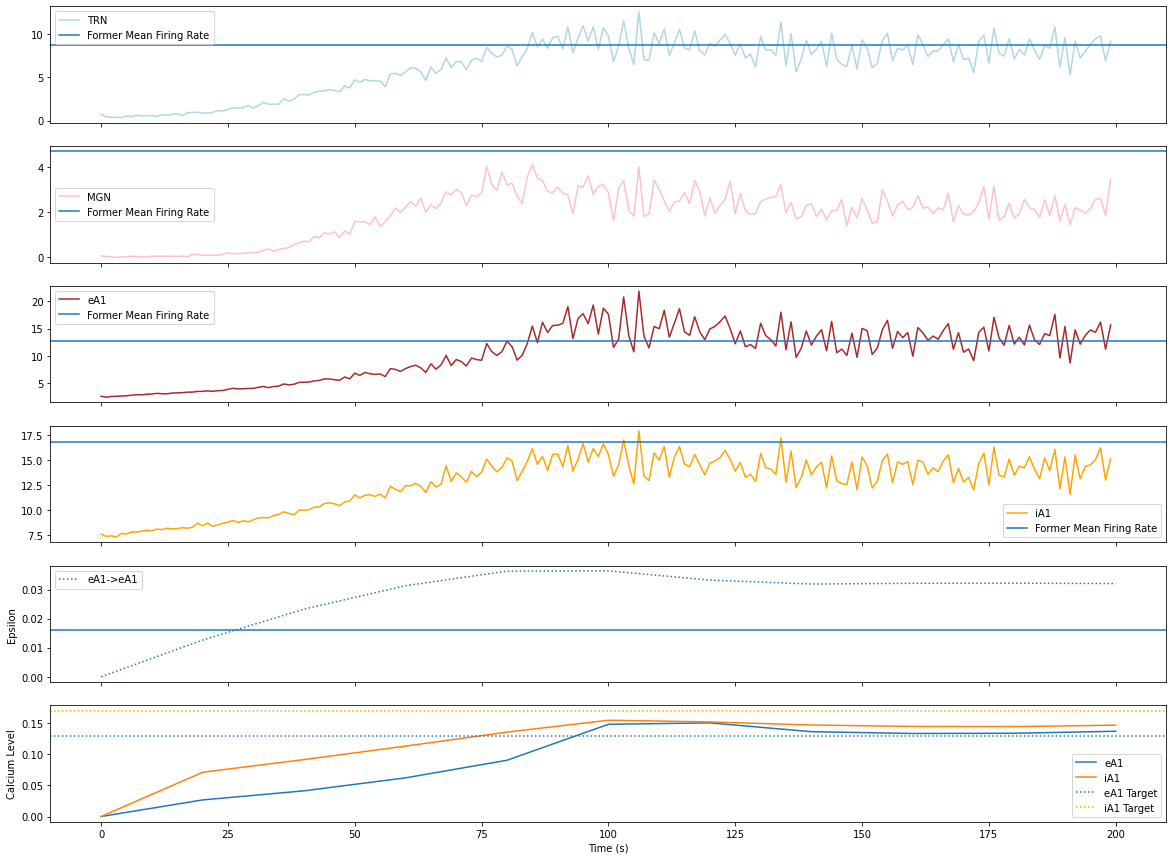

In [29]:
pth = "../demyelination/data/plasticity-cadist/activity/"
fl = 'spk_plasticity-cadist_T=0_'

connectivity = gatherConnectivity(pth, fl, 8)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             8, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0
tstop = 200 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, 8, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, 8, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 8)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

# ax[6].plot(x_range, connectivity['z']['Axon']['in']['iA1'], label="eA1")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-ca-exponentialdistb.pdf")

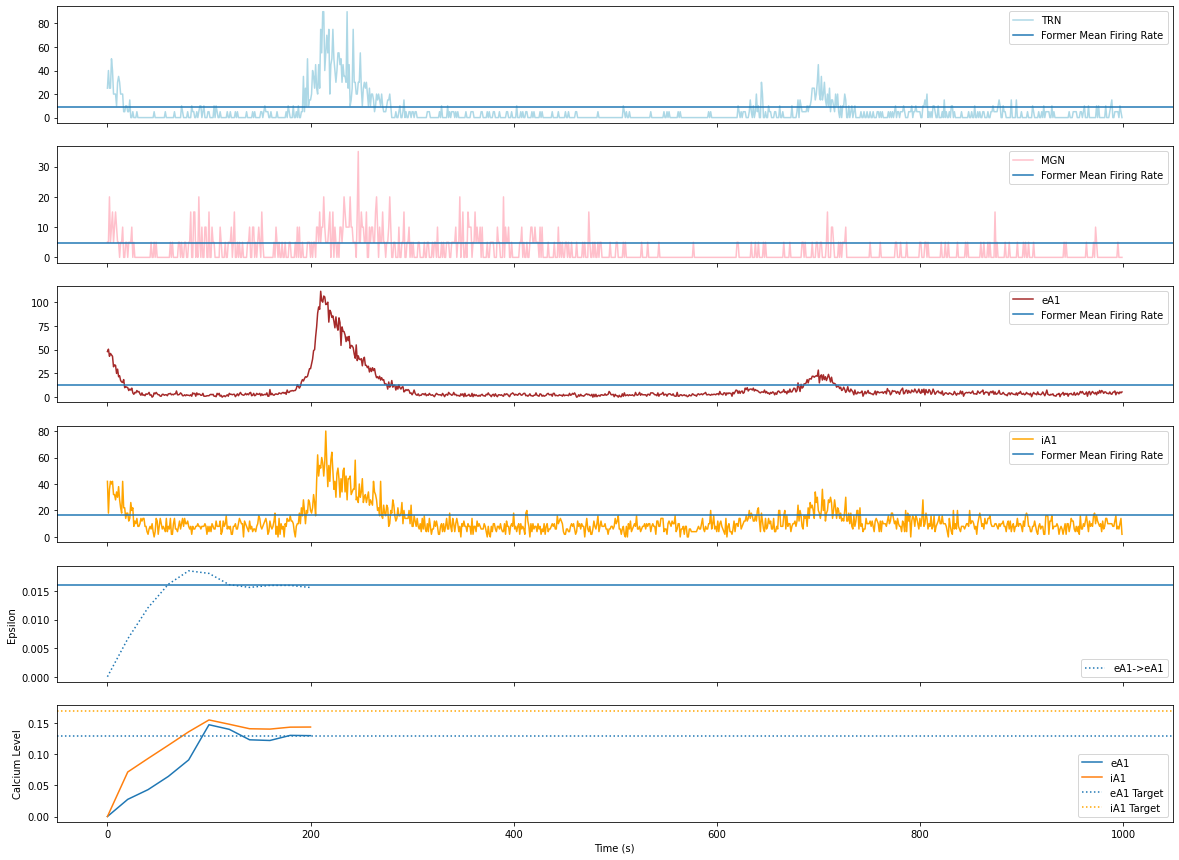

In [25]:
pth = "../demyelination/data/plasticity-cadist-allconn/activity/"
fl = 'spk_plasticity-cadist-allconn_T=0_'

nthreads = 1

connectivity = gatherConnectivity(pth, fl, nthreads)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 195 * 1000
tstop = 196 * 1000
    
resolution = 1

x = gatherSpikes(pth, fl, nthreads, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 201, 20)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# ax[3].axv

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")

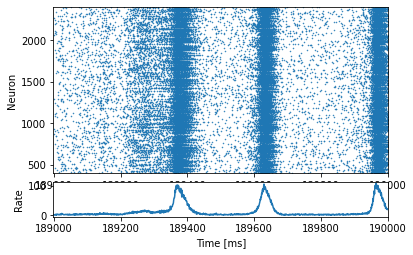

In [26]:
gatherSpikes(pth, fl, nthreads, "eA1", 401, 2400).time_slice(189000, 190000).raster_plot(with_rate=True, ms=1)

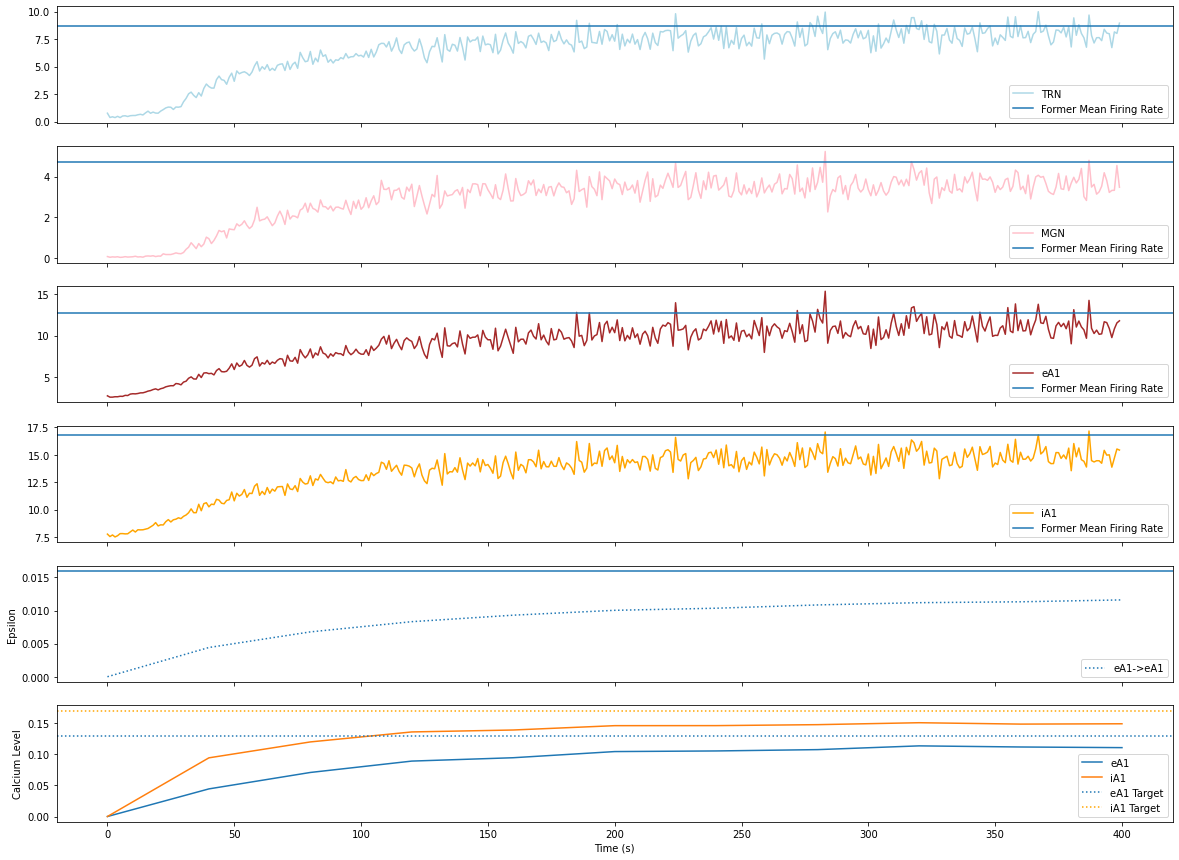

In [27]:
pth = "../demyelination/data/plasticity-cadist-allconn-gauss/activity/"
fl = 'spk_plasticity-cadist-allconn-gauss_T=0_'

nthreads = 1

connectivity = gatherConnectivity(pth, fl, nthreads)

ex_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "eA1")

in_eA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "eA1")

ex_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "eA1", "iA1")

in_iA1 = gatherNestConnectivity(pth, \
             fl, \
             nthreads, "iA1", "iA1")

# DendriteType_Population
#perc_ex_eA1 = np.divide(ex_eA1, np.sum((ex_eA1, in_eA1), axis=0))
perc_ex_eA1 = np.divide(ex_eA1, 2000*2000)
perc_in_eA1 = np.divide(in_eA1, 500*2000)

perc_ex_iA1 = np.divide(ex_iA1, 500*2000)
perc_in_iA1 = np.divide(in_iA1, 500*500)

## Data Gathering End
## Plotting Start

fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True)
fig.set_size_inches(20, 15)

tstart = 0 * 1000
tstop = 400 * 1000
    
resolution = 1000

x = gatherSpikes(pth, fl, nthreads, "TRN", 201, 400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[0].plot(x, label='TRN', c='lightblue')
ax[0].axhline(8.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['MGN'].id_slice(np.arange(41, 201)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "MGN", 1, 200).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[1].plot(x, label='MGN', c='pink')
ax[1].axhline(4.7, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['eA1'].id_slice(np.arange(801, 2400)).time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "eA1", 401, 2400).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[2].plot(x, label='eA1', c='brown')
ax[2].axhline(12.8, label="Former Mean Firing Rate")

# x, y = pipeline.smoothedspikes(p.spikeobj['iA1'].time_slice(tstart, tstop))
x = gatherSpikes(pth, fl, nthreads, "iA1", 2401, 2900).time_slice(tstart, tstop).firing_rate(resolution, average=True)
ax[3].plot(x, label='iA1', c='orange')
ax[3].axhline(16.8, label="Former Mean Firing Rate")

x_range = np.arange(0, 401, 40)

ax[4].plot(x_range, perc_ex_eA1, ":", label="eA1->eA1")
# ax[4].plot(x_range, perc_in_eA1, ":", label="iA1->eA1")
# ax[4].plot(x_range, perc_ex_iA1, ":", label="eA1->iA1")
# ax[4].plot(x_range, perc_in_iA1, ":", label="iA1->iA1")
ax[4].axhline(0.016)
ax[4].set_ylabel("Epsilon")

ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['eA1'], label="eA1")
ax[5].plot(x_range, gatherCalcium(pth, fl, 1)['iA1'], label="iA1")
ax[5].axhline(.13, ls=":", label="eA1 Target")
ax[5].axhline(.17, ls=":", label="iA1 Target", color="orange")
ax[5].set_ylabel("Calcium Level")

plt.xlabel("Time (s)")
# plt.ylabel("Mean Spiking Rate")

# plt.xticks(range(0, 20, 1), range(0, 1000, 50))

[ax[_].legend() for _ in range(6)];

# ax[3].axv

# plt.xlim(0, 10)
# ax[4].set_ylim(0.014, .016)

# plt.savefig("/home/pbr-student/Downloads/thesis-plots/destexhe-sp-noautapse-spdisabled-onepsix.pdf")